# Tensorflow basis

In [9]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [1]:
import tensorflow as tf 

tf1 = tf.Variable(1)
tf2 = tf.Variable(10)
tf3 = tf1 +tf2
print (tf3)


tf.Tensor(11, shape=(), dtype=int32)


2024-11-02 23:03:32.756621: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-02 23:03:32.756654: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-02 23:03:32.756662: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-02 23:03:32.756676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 23:03:32.756688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Example 2
create add function and substraction function in tensorflow



In [19]:
import tensorflow as tf
import numpy as np
@tf.function
def add (a,b) :
    a = a+b
    return a ,
@tf.function
def substract(a,b):
    a = a-b 
    return a


a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

result = add(a,substract(b,c))
result = np.array(result)
print(result[0])
    

10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [25]:
import tensorflow as tf
import numpy as np
@tf.function
def add (a,b) :
    a = a+b
    return a ,
@tf.function
def substract(a,b):
    a = a-b 
    return a
@tf.function
def mult(a,b):
    a = a*b 
    return a

a = tf.Variable([[1,2,3],[5,6,7]])
b = tf.Variable ([[5,4,6],[4,8,6]])
c = tf.Variable ([[2,6,63],[6,10,4]])

result = add(c,mult(a,b))
result = np.array(result)
print(result)
    

[[[ 7 14 81]
  [26 58 46]]]


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

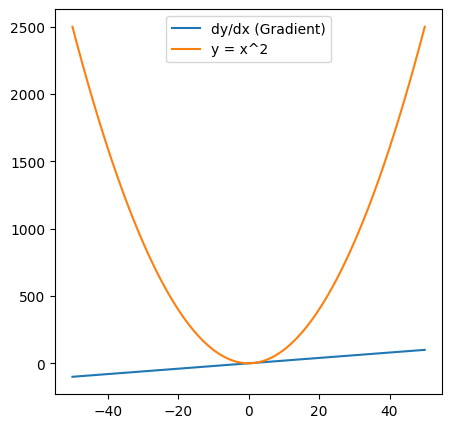

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 

def sqr(x):
    y = tf.square(x)
    return y 

x = np.linspace(-50, 50, 100)
z = tf.Variable(x, dtype=tf.float32)

with tf.GradientTape() as tape:
    y = sqr(z)

result_dy = tape.gradient(y, z)
result = sqr(z)

result_dy = result_dy.numpy()
result = result.numpy()

plt.figure(figsize=(5, 5))
plt.plot(x, result_dy, label="dy/dx (Gradient)")
plt.plot(x, result, label="y = x^2")
plt.legend()
plt.show()


# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

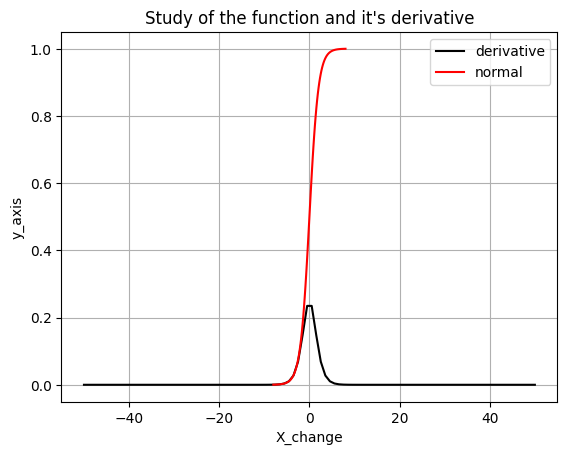

In [69]:
import numpy as np 
import tensorflow as tf
def sigmoid(x) :
    y = 1/(1+(tf.exp(-x)))
    return y
x = np.linspace(-8,8,100)
change= tf.Variable(z)
with tf.GradientTape() as tape :
    dy = sigmoid(change)

result_dy = tape.gradient(dy,change)
result = sigmoid(x)

plt.plot(change,result_dy ,label='derivative',color='black')
plt.plot(x,result,label = 'normal',color='red')
plt.xlabel('X_change')
plt.ylabel("y_axis")
plt.title("Study of the function and it's derivative")

plt.grid(True)
plt.legend()


# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

ValueError: Argument Z must be 2-dimensional.

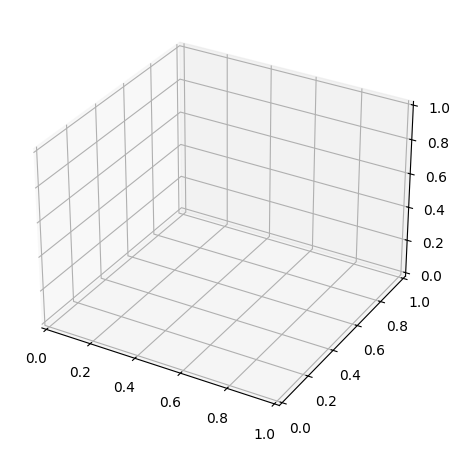

In [122]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
def g(x,z) :
    y = tf.exp(-(x**2)/np.square(z))
    return y

x = np.linspace(-10,10,50)
#print(x)
x1 = tf.Variable(x)
y = np.linspace(-5,5,50)
y1 = tf.Variable(y)
with tf.GradientTape() as tape:
    tape.watch(x1)
    resultdy1 = g(x1, y1)

result_dy = tape.gradient (resultdy1,x1)
result =  g(x,y)
result_dy=np.array(result_dy)
print(result_dy.shape)
print(result.shape)
print(y1.shape) 
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 1, 1, projection='3d')
ax1.plot_surface(x, y, result_dy, cmap='plasma')
ax1.set_title("Gradient of g(x, y) with respect to x")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("dy/dx")



In [89]:
import numpy as np
import tensorflow
x = np.linspace(-5,5,5)
y = np.linspace(1,5,5)
x1,x2  = np.meshgrid(x,y)
print('x',x)
print('y',y)
print(x1)

x [-5.  -2.5  0.   2.5  5. ]
y [1. 2. 3. 4. 5.]
[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]]


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

/Users/esmaelmoataz/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_333 (Dense)               │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_334 (Dense)               │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_335 (Dense)               │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,853 (7.24 KB)

 Trainable params: 1,853 (7.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7135 - loss: 0.8794 - val_accuracy: 0.5000 - val_loss: 0.9868
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7148 - loss: 0.8191 - val_accuracy: 0.5000 - val_loss: 0.8570
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6341 - loss: 0.7716 - val_accuracy: 0.7083 - val_loss: 0.7840
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6862 - loss: 0.7155 - val_accuracy: 0.7917 - val_loss: 0.7417
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7578 - loss: 0.6741 - val_accuracy: 0.8333 - val_loss: 0.7144
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7747 - loss: 0.6604 - val_accuracy: 0.7083 - val_loss: 0.6946
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8021 - loss: 0.6066 - val_accuracy: 0.6250 - val_loss: 0.6798
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7331 - loss: 0.5981 - val_accuracy: 0.6667 - val_loss: 0.6584

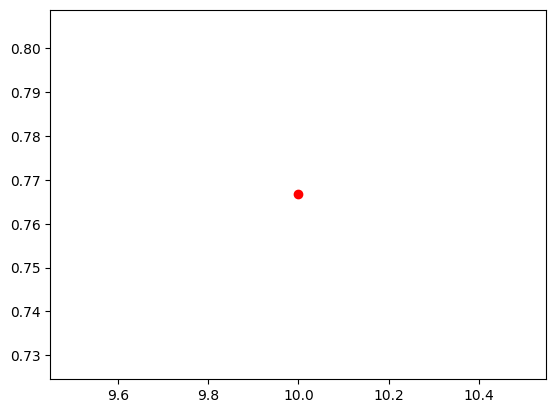

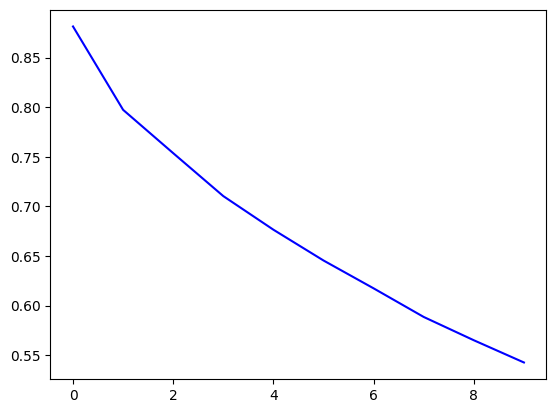

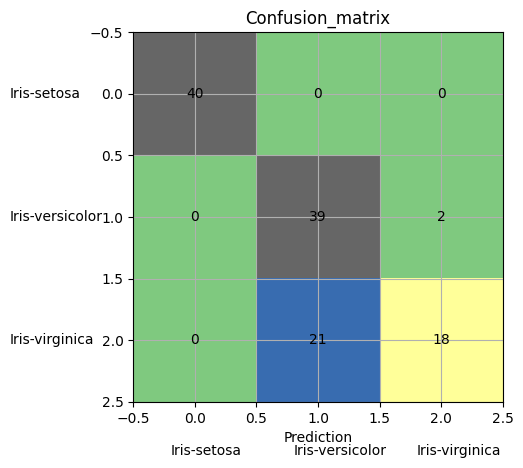

In [119]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sklearn.model_selection as sk
import sklearn.metrics as sk1


data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header= None)
train = data.iloc[:,0:4]
target = data.iloc[:,4:5]
target = pd.get_dummies(target, columns=[4])


#train = data.iloc[]
x_train , x_test,y_train,y_test = sk.train_test_split(train,target,test_size= 0.2,random_state=42)
#print(x_train.shape)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(30,input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation = 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history =model.fit(x_train,y_train,epochs = 10,validation_split = 0.2)
prediction = model.predict(x_train)


acc , loss = model.evaluate(x_test,y_test)
epoch = range(1,len(history.history['loss'])+1)
print(f'this is the accuracy {acc},this is the loss number: {loss}')
confx = np.argmax(prediction,axis =1)
#print(x_train.values)
print("hello")
print(y_train.idxmax(axis=1).unique())


plt.scatter(10,loss,color='red')
plt.show()
plt.plot(history.history['loss'],color='blue')
plt.show()
#print(f'hello'{y_train.head)
confusion_matrix = sk1.confusion_matrix(np.argmax(np.array(y_train),axis=1),confx )
plt.imshow(confusion_matrix,interpolation='nearest',cmap ='Accent')
plt.title("Confusion_matrix")
plt.grid(True)
plt.xlabel("Prediction")

for i in range (confusion_matrix.shape[0]) :
    for j in range (confusion_matrix.shape[0]) :
        plt.text(i,j,confusion_matrix[j,i], ha="center", va="center", color="black")
'''
plt.text(-1.5,0,'Iris-setosa', ha="left", va="center", color="black")
plt.text(-1.5,1,'Iris-versicolor', ha="left", va="center", color="black")
plt.text(-1.5,2,'Iris-virginica', ha="left", va="center", color="black")
plt.text(-0.2,2.9,'Iris-setosa', ha="left", va="center", color="black")
plt.text(0.8,2.9,'Iris-versicolor', ha="left", va="center", color="black")
plt.text(1.8,2.9,'Iris-virginica', ha="left", va="center", color="black")
'''
# Labels for the classes
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Position the labels on the y-axis
for i, label in enumerate(labels):
    plt.text(-1.5, i, label, ha="left", va="center", color="black")

# Position the labels on the x-axis
for j, label in enumerate(labels):
    plt.text(j - 0.2, 2.9, label, ha="left", va="center", color="black")



In [28]:
model.save('model.keras')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.6809 - val_accuracy: 0.5000 - val_loss: 0.6730
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4531 - loss: 0.6410 - val_accuracy: 0.0000e+00 - val_loss: 0.6488
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3359 - loss: 0.6113 - val_accuracy: 0.0000e+00 - val_loss: 0.6319
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3359 - loss: 0.5904 - val_accuracy: 0.5000 - val_loss: 0.6232
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5773 - val_accuracy: 0.5000 - val_loss: 0.6174
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5668 - val_accuracy: 0.5000 - val_loss: 0.6115
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6797 - loss: 0.5562 - val_accuracy: 0.5000 - val_loss: 0.6048
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5450 - val_accuracy: 0.5000 - val_loss: 

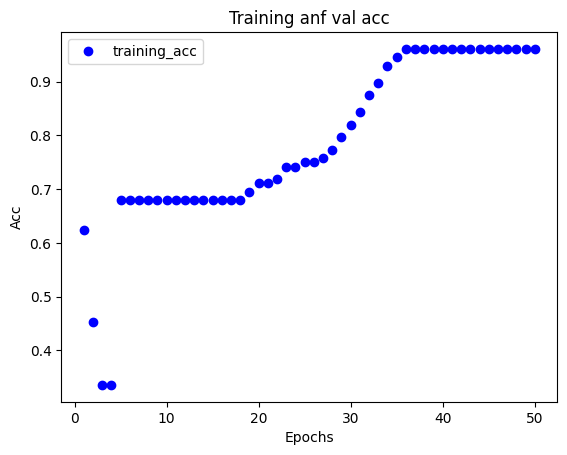

In [51]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)
acc_values = history.history['accuracy']
plt.clf()
plt.plot(epochs, acc_values, 'bo', label="training_acc")
plt.title("Training anf val acc")
plt.xlabel('Epochs')
plt.ylabel("Acc")
plt.legend()
plt.show()

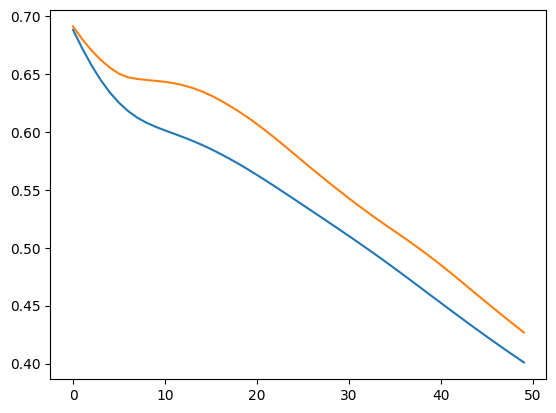

In [25]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")

In [32]:
e=model.evaluate(x_test,y_test)
print(e)

y_predict = model.predict(x_test)
print(y_predict[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.2754
[0.27536720037460327, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.16836198e-01 4.33733970e-01 5.45860492e-02]
 [2.21749023e-01 3.73611927e-01 1.19860815e-02]
 [8.07432950e-01 3.83585066e-01 1.00928266e-03]
 [6.49047792e-01 4.29420114e-01 3.43265268e-03]
 [1.44843070e-04 1.55633897e-01 9.88287807e-01]]


In [34]:
# confusion matrix
m=np.array([0.0,0.0,0.0])
mz=np.outer(m,m)
n=len(y_test)

for i in range(n):
  p = np.round(y_predict[i])
  t = np.round(y_test[i])
  mz += np.outer(p,t)

print(mz)


[[6. 0. 0.]
 [0. 0. 0.]
 [0. 0. 5.]]


In [57]:
predicted_labels = (y_predict >= 0.5).astype(int)
true_labels = (y_test >= 0.5).astype(int)

In [60]:
from sklearn.metrics import confusion_matrix
# Loop through each class
for i in range(true_labels.shape[1]):
    cm = confusion_matrix(true_labels[:, i], predicted_labels[:, i])
    print(f"Confusion Matrix for Class {i}:")
    print(cm)

Confusion Matrix for Class 0:
[[13  0]
 [ 1  6]]
Confusion Matrix for Class 1:
[[12  0]
 [ 8  0]]
Confusion Matrix for Class 2:
[[15  0]
 [ 0  5]]


(array([1., 0., 0.], dtype=float32), array([1., 0., 0.]))